### Notebook by [Volkan Sonmez] (http://www.pythonicfool.com/)  
### Framingham Dataset is analyzed with matplotlib.image library 
### A One-Layer-NN and KNN algorithms are written from scratch with numpy. The models are trained and tested. For checking the performace and accuracy of our models with a third party, Sklearn's Logistic Regression model is run on this dataset. A Three-Layer_NN is also created with pytorch to see if/how model's complexity show difference in test accuracy. 


####  https://github.com/volkansonmez/Exploratory_Data_Analysis_and_ML_Projects


## Table of contents

1. [Introduction](#Introduction)

2. [License](#License)

3. [EDA and Building ML Model](#EDA_and_Building_ML_Model)

4. [Conclusion](#Conclusion)

## Introduction

[[ go back to the top ]](#Table-of-contents)
    
Raw framingham.csv dataset is downloaded from Kaggle. The dataset is cleaned, the feature scoring analysis and pruning is done. 3 different ML algorithms are applied for logistic regression analysis. There are clean instructions to follow each step for the beginners.

## License

[[ go back to the top ]](#Table-of-contents)

Please see the [repository README file](https://github.com/volkansonmez/Exploratory_Data_Analysis_and_ML_Projects) 
for the licenses and usage terms for the instructional material and code in this notebook.

## EDA_and_Building_ML_Model

[[ go back to the top ]](#Table-of-contents)

How to do it: 

After cleaning the dataset, drop the NA values, check the feature scores with chi2 test. Any feature score below 10 is dismissed in this notebook but you are welcome to change your min. feature score value. Since it is a logistic regression problem, write the sigmoid function and its derivative to be used later in NN. 

Create a one layer neural network from scratch (not with pytorch but with numpy only) and train it. Do a grid search for optimimum iterations, learning rate, and learning rate decay for obtaining the best test accuracy. 

Write KNN from scratch to see if it is possible to beat the deep learning method in test accuracy. Tweak the KNN just for this problem to adapt it to the data since it is mostly composed of "0" values in the target column (this is not recommended outside of this particular problem)

Compare your results of sklearn's logistic regression algorithm. Show your results in confusion matrix.

BONUS: Create a more complex NN model with pytorch sequential (a model with few layers) to see if increasing the model's complexity will help reaching better accuracy. 

This data is specifically selected for showing students that sometimes the data is not sufficient to reach a good accuracy regardless of any machine learning algorithm used. Increasing complexity sometimes is not necessary. If your data is good, sufficient, and not too noisy, you can get good results.  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
%matplotlib inline

# Import the dataset
framingham_data = pd.read_csv("framingham.csv") 
print(len(framingham_data))
print(framingham_data[:5]) # visualize the first 5 instances of the dataset

df = framingham_data # make a copy of the data to play with it
df.isna().sum()

# Unmark the below lines to check for duplicates if needed
# duplicate_df = df[df.duplicated()]
# print(duplicate_df)

4238
   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [3]:
# Drop the NaN values
df = df.dropna()
print(df.shape)
# Check if there are any NaN values left in the dataset. 
df.isna().sum()


(3656, 16)


male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [4]:
# View the number of 1's and 0's in the dataset
df.TenYearCHD.value_counts()

0    3099
1     557
Name: TenYearCHD, dtype: int64

In [5]:
# Check the feature scores 
print(df.shape)# the total number of attributes including the label

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df.iloc[:,:-1]   # data
y = df.iloc[:,-1]    # labels

# check the scores
bestfeatures = SelectKBest(score_func=chi2, k= "all")
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns, dfscores], axis=1, sort= False)
featureScores.columns = ['Specs','Score']  
print(featureScores)
print(df.shape)

(3656, 16)
              Specs       Score
0              male   17.120430
1               age  295.507761
2         education    7.679797
3     currentSmoker    0.686913
4        cigsPerDay  156.567318
5            BPMeds   28.153003
6   prevalentStroke    8.497823
7      prevalentHyp   82.967184
8          diabetes   31.027987
9           totChol  249.153078
10            sysBP  669.506552
11            diaBP  142.878574
12              BMI   15.730717
13        heartRate    2.919062
14          glucose  379.583137
(3656, 16)


In [ ]:
# Drop the unnecessary columns 
df = df.drop(['currentSmoker','education', 'heartRate', 'prevalentStroke'] ,axis=1, inplace=True)

In [7]:
X = df.iloc[:,:-1]   # data
y = df.iloc[:,-1]    # labels

# normalize the dataset
print(df.shape)
print(X.shape, y.shape)

# Rescale the values in the attributes between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)) 
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns= X.columns)

# view the data description
X_scaled.describe()

(3656, 12)
(3656, 11) (3656,)


,male,age,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,0.462038,0.128888,0.030361,0.311543,0.027079,0.254360,0.231054,0.369440,0.248284,0.118238
std,0.496883,0.225293,0.170270,0.171602,0.463187,0.162335,0.090547,0.104456,0.126718,0.098544,0.067543
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.263158,0.000000,0.000000,0.000000,0.000000,0.190965,0.158392,0.285714,0.182744,0.087571
50%,0.000000,0.447368,0.000000,0.000000,0.000000,0.000000,0.248460,0.210402,0.359788,0.238488,0.107345
75%,1.000000,0.631579,0.285714,0.000000,1.000000,0.000000,0.308522,0.286052,0.444444,0.302957,0.132768
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# Turn the dataframe into numpy array, shuffle the data, do the test and train split, reshape the labels

dataset = np.array(X_scaled)
y = np.array(y)

# shuffle the data, separate data to test and train sets
np.random.seed(0)
shuffled_indices = np.random.permutation(len(y))
shuffled_dataset = dataset[shuffled_indices]

# assign the test and train data manually
train_set = shuffled_dataset[:3100]
test_set = shuffled_dataset[3100:]
print(train_set[0])
print(test_set[0])

# assign the test and train labels
y = y[:, np.newaxis]
shuffled_labels = y[shuffled_indices]
train_label = shuffled_labels[:3100]
test_label = shuffled_labels[3100:]
print('labels:', train_label[:5], test_label[:5]) # visualize the labels
test_label.shape


[1.         0.52631579 0.21428571 0.         0.         0.
 0.15811088 0.16312057 0.33862434 0.21643238 0.13559322]
[0.         0.63157895 0.42857143 0.         0.         0.
 0.35934292 0.18676123 0.23280423 0.07464857 0.15819209]
labels: [[0]
 [0]
 [0]
 [1]
 [0]] [[0]
 [0]
 [1]
 [0]
 [0]]


(556, 1)

In [9]:
# Before moving on with a classic ML algorithm to do logistic regression, revisit the label score rates
target_count = df.TenYearCHD.value_counts()
print(target_count)
# if accuracy was going to be evaluated based on sensitivity and specificity these are the tp and tn amounts below:
tp_rate = 557/len(df)
tn_rate = 3099/len(df)
print(tp_rate , tn_rate)

0    3099
1     557
Name: TenYearCHD, dtype: int64
0.15235229759299782 0.8476477024070022


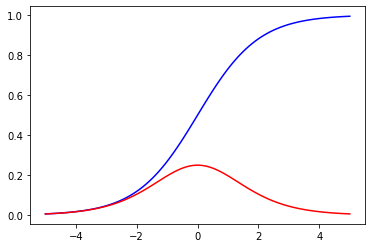

In [10]:
# Write and test the sigmoid function 
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_p(x):
    return sigmoid(x) * (1-sigmoid(x))

# Visualize the sigmoid function and its derivative
X = np.linspace(-5, 5, 100)
plt.plot(X, sigmoid(X), c="b") # sigmoid in blue
plt.plot(X, sigmoid_p(X), c="r") # sigmoid_p in red

In [11]:
# Write a one layer NN and train the network, test it and analyze the result with confusion matrix
# Analyze the accuracy with a grid search on all hyperparameters

import numpy as np
class Neural_Network():
    def __init__(self):
        # set the network parameters
        self.inputSize = 11 # there are 11 attributes for each input. 
        self.outputSize = 1 # the output will be a single value

        # set the weights
        self.W = 0.01 * np.random.randn(self.inputSize, self.outputSize)
        self.b = np.zeros([1, self.outputSize])
        self.lr = 0.01
        
    def forward(self, input_data):
        # forward propagation
        self.z = np.dot(input_data, self.W) + self.b # dot product of X (input) and weights
        self.o = self.sigmoid(self.z) # fit the logit into the activation function
        return self.o # return scores

    def sigmoid(self, s):
        # activation function
        return 1/(1+np.exp(-s))

    def dsigmoid(self, s):
        # derivative of sigmoid
        return s * (1 - s)

    def backward(self, input_data, label):
        # backward propagation 
        #self.do = self.o - label # (since the loss function used is: log loss)
        self.dz = self.o - label
        self.db = self.dz 
        self.dW = np.dot(input_data.T , self.dz)

        # vanilla update of the weights and biases
        self.b -=  self.lr * self.db
        self.W -=  self.lr * self.dW 
    
    # all parameters here are LIST of numbers to do grid search to optimize the results  
    def train(self, train_set, test_set, test_label, train_label, iteration_i, lr, decay): 
        NN.lr = lr
        # train the network 
        for i in range(iteration_i):
            ri = np.random.randint(len(train_set)) # random index
            rd = train_set[ri] # instance at the random index picked
            rd = rd[np.newaxis,:] # reshape the instance to 2D. (1,12)
            y = train_label[ri] # label of the random instance picked
            self.forward(rd)
            self.backward(rd, y)
            if (i % 100) == 299:
                NN.lr *= decay 
        # done with the training, test the test set data on the trained network
        pred_list = [] # store the predictions in this list
        for j in range(len(test_set)): # for each item in the test set, make predictions and check the accuracy
            test_data = test_set[j] 
            fwd_prop = NN.forward(test_data)
            predict_value = float(fwd_prop)
            if predict_value < 0.5:
                prediction = 0
            else:
                prediction = 1
            pred_list.append(prediction)
        # pass the predictins to confusion matrix
        tn, fp, fn, tp = confusion_matrix(test_label, pred_list).ravel() # actual labels compared with predictions 
        specificity_and_sensitivity_average = (0.85* tn/(tn+fp) + 0.15* tp/(tp+fn)) # weighted average 
        return specificity_and_sensitivity_average, pred_list

    
#     def saveWeights(self): # this saves a text file in the same working folder when the best training is found
#         np.savetxt("w.txt", self.W)
#         np.savetxt("b.txt", self.b)


# Grid search for the number of iterations, learning rate and learning rate decay for the best accuracy
test_label = test_label.reshape(len(test_label))  # reshape the test label
iterations = [300, 500, 1000, 2000, 4000, 5000]
lr = [1e-5, 5*1e-4, 1e-4, 5*1e-4, 5*1e-3, 1e-3, 5*1e-3, 1e-2, 5*1e-2, 1e-1]
lr_decay =[0.99, 0.98, 0.97, 0.96, 0.95, 0.90]
best_specificity_and_sensitivity = 0
iteration_accuracy_at = 0
pred_list = []
for i in iterations:
    for k in lr:
        for n in lr_decay:
            NN = Neural_Network() # initialize the object
            #('training with:', i,'iterations', k, 'learning rate', n, 'learning rate decay')
            specificity_and_sensitivity_average , pred_list = NN.train(train_set, test_set, test_label, train_label, i, k, n)
            if specificity_and_sensitivity_average  > best_specificity_and_sensitivity:
                best_specificity_and_sensitivity = specificity_and_sensitivity_average
                mark_i = i
                mark_k = k
                mark_n = n
                best_pred_list = pred_list

print('best hyper-parameters:', mark_i, mark_k, mark_n) 
print(np.array(best_pred_list[:25]), test_label[:25])
accuracy = np.mean(best_pred_list == test_label)
print('accuracy', accuracy)
tn, fp, fn, tp = confusion_matrix(test_label, best_pred_list).ravel()
print(tn, fp, fn, tp)
weighted_accuracy = (0.85* tn/(tn+fp) + 0.15* tp/(tp+fn))
print(weighted_accuracy)

best hyper-parameters: 2000 0.1 0.98
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
accuracy 0.8776978417266187
487 0 68 1
0.8521739130434782


for i =: 1 tn, fp, fn, tp values are:  428 59 55 14
for i =: 2 tn, fp, fn, tp values are:  466 21 67 2
for i =: 3 tn, fp, fn, tp values are:  449 38 57 12
for i =: 4 tn, fp, fn, tp values are:  475 12 65 4
for i =: 5 tn, fp, fn, tp values are:  466 21 60 9
for i =: 6 tn, fp, fn, tp values are:  474 13 64 5
for i =: 7 tn, fp, fn, tp values are:  468 19 63 6
for i =: 8 tn, fp, fn, tp values are:  476 11 67 2
[79.5, 84.17, 82.91, 86.15, 85.43, 86.15, 85.25, 85.97]


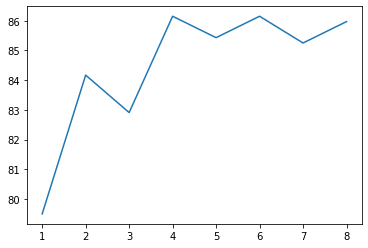

In [12]:
# Write a KNN to analyze the data. Then, compare it with the one layer NN above. 

# view the data type and shape one more time using numpy arrays.
# print(type(test_set), test_set.shape)
# print(type(train_set), train_set.shape)
# print(type(test_label), test_label.shape) 
# print(type(train_label), train_label.shape)

def K_Nearest_Neighbor(test_set, test_label, train_set, train_label, n): 
    results = []
    for i in range(len(test_set)):
        indices_visited = [] # make a list of indices visited
        votes = np.zeros(2)
        for j in range(n):
            min = np.inf
            for k in range(len(train_set)):
                difference = np.linalg.norm(train_set[k] - test_set[i])
                if difference < min and k not in indices_visited:
                    min = difference
                    index_at_min_distance = k
                    the_label_found_at_min_dist = int(train_label[k])
            indices_visited.append(index_at_min_distance)
            votes[the_label_found_at_min_dist] +=1
        label_of_max_votes = np.argmax(votes)
        results.append(label_of_max_votes)
    # check the accuracy by comparing predictions with the actual test labels
    tn, fp, fn, tp = confusion_matrix(test_label, results).ravel()
    print('for i =:', n, 'tn, fp, fn, tp values are: ' , tn, fp, fn, tp  )
    best_score = (0.85* tn/(tn+fp) + 0.15* tp/(tp+fn))
    accuracy = np.sum(results == test_label) / len(test_label)
    return best_score, np.around(100*accuracy, decimals = 2) 
    
all_results = []   
for i in range(1,9):
    best_scores, accuracy = K_Nearest_Neighbor(test_set, test_label, train_set, train_label, i)
    all_results.append(accuracy)
print(all_results)
plt.plot(np.arange(1,9), np.array(all_results))

for i =: 1 tn, fp, fn, tp values are:  428 59 55 14
for i =: 2 tn, fp, fn, tp values are:  466 21 67 2
for i =: 3 tn, fp, fn, tp values are:  449 38 57 12
for i =: 4 tn, fp, fn, tp values are:  475 12 65 4
for i =: 5 tn, fp, fn, tp values are:  466 21 60 9
for i =: 6 tn, fp, fn, tp values are:  474 13 64 5
for i =: 7 tn, fp, fn, tp values are:  468 19 63 6
for i =: 8 tn, fp, fn, tp values are:  476 11 67 2
[79.5, 84.17, 82.91, 86.15, 85.43, 86.15, 85.25, 85.97]


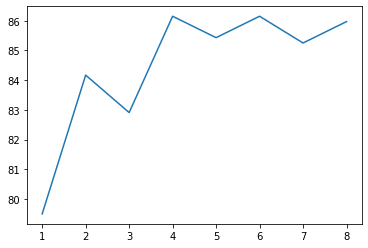

In [13]:
# See if more weights is given to find the TPs, would yield a better accuracy. 
# (Don't try this at work! You might be fired even if you are right. Remember, this dataset has 85% negatives)

def Tweaked_K_Nearest_Neighbor(test_set, test_label, train_set, train_label, n): 
    results = []
    for i in range(len(test_set)):
        indices_visited = [] # make a list of indices visited
        votes = np.zeros(2)
        for j in range(n):
            min = np.inf
            for k in range(len(train_set)):
                difference = np.linalg.norm(train_set[k] - test_set[i])
                if difference < min and k not in indices_visited:
                    min = difference
                    index_at_min_distance = k
                    the_label_found_at_min_dist = int(train_label[k])
            indices_visited.append(index_at_min_distance)
            votes[the_label_found_at_min_dist] +=1
        if votes[1] >= n//2:
            weighted_votes = 1
        else:
            weighted_votes = 0
        results.append(weighted_votes)
    tn, fp, fn, tp = confusion_matrix(test_label, results).ravel()
    print('for i =:', n, 'tn, fp, fn, tp values are: ' , tn, fp, fn, tp  )
    best_score = (0.85* tn/(tn+fp) + 0.15* tp/(tp+fn))
    accuracy = np.sum(results == test_label) / len(test_label)
    return best_score, np.around(100*accuracy, decimals = 2) 

# view some of the results to judge the accuracy of this model:
all_results = []   
for i in range(1,9):
    best_scores, accuracy = K_Nearest_Neighbor(test_set, test_label, train_set, train_label, i)
    all_results.append(accuracy)
print(all_results)
plt.plot(np.arange(1,9), np.array(all_results))


/Users/volkansonmez/miniconda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.8758992805755396
[[484   3]
 [ 66   3]]
0.8512855995000446


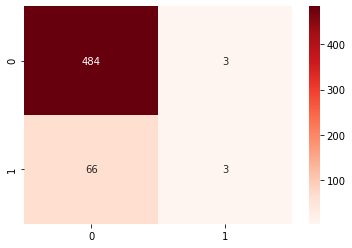

In [14]:
# Check the sklearn linear model's logistic regression classifier and compare it with the above algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression().fit(train_set, train_label)
pred = clf.predict(test_set)
# check accuracy: Accuracy = (True Pos + True Negative)
accuracy = accuracy_score(test_label, pred)
print(accuracy)
cnf_matrix_log = confusion_matrix(test_label, pred)
print(cnf_matrix_log) 
sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')

# conclusion: it is not a good system, sensitivity rate is very low, false negatives are high
tn, fp, fn, tp = confusion_matrix(test_label, pred).ravel()
weighted_accuracy = (0.85* tn/(tn+fp) + 0.15* tp/(tp+fn))
print(weighted_accuracy)

In [58]:
# BONUS: Do a simple 3 layer pytorch sequential model, train it, and test the data

import numpy as np
import random
import torch
from torch import nn, optim
import torch.functional as F
from IPython import display

y = y.reshape(-1)
# prepare the data for torch tensors
x = torch.from_numpy(train_set).float()
y = torch.from_numpy(train_label).float()

dtype = float

D_in, H1, H2, D_out = 11, 50, 10, 1
learning_rate = 1e-3


model = nn.Sequential(
    nn.Linear(D_in, H1),
    nn.ReLU(),
    nn.Linear(H1, H2),
    nn.ReLU(),
    nn.Linear(H2, D_out),
    nn.Sigmoid(),
)

# nn package also has different loss functions.
criterion = torch.nn.BCELoss()

# we use the optim package to apply
# stochastic gradient descent for our parameter updates
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 

# Training
for t in range(100):
    
    # Feed forward to get the logits
    y_pred = model(x)
    
    # Compute the loss and accuracy
    loss = criterion(y_pred, y)
    score, predicted = torch.max(y_pred, 1)
    y = y.reshape(-1)
    acc = ((y == predicted).sum()).float() / len(x)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    display.clear_output(wait=True)
    
    # zero the gradients before running
    # the backward pass.
    optimizer.zero_grad()
    
    # Backward pass to compute the gradient
    # of loss w.r.t our learnable params. 
    loss.backward()
    
    # Update params
    optimizer.step()


[EPOCH]: 99, [LOSS]: 0.465822, [ACCURACY]: 0.843


/Users/volkansonmez/miniconda/lib/python3.7/site-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([3100])) that is different to the input size (torch.Size([3100, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


## Conclusion

[[ go back to the top ]](#Table-of-contents)
    

KNN, Sklearn's Logistic Regression, a One layer NN, and a Three layer NN models all fail to get a good accuracy (more than 85%) since the dataset is too noisy. When all these models get trained with optimium hyperparameters the accuracy is reaching max 87% but there is too much false positives and false negatives in the confusion matrix which reveals that this dataset is too small and noisy.

Keep in mind: Dataset's quality and size is directly corralated with any model's accuracy.